In [96]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas
import os
import re
import pymongo
import json
from flask import Flask, jsonify, json
from flask_pymongo import PyMongo

DBS_NAME = os.getenv("DBS_NAME")
MONGO_URI = os.getenv("MONGODB_URI")

app = Flask(__name__)
app.config["DBS_NAME"] = "cookbook"
app.config["MONGO_URI"] = "mongodb://localhost:27017/cookbook"
mongo = PyMongo(app)

RECIPES_DATA_PATH = 'recipes.json'
allergen_list = [a for a in mongo.db.allergens.find()]


def read_json(file_path):
    results = []
    with open(RECIPES_DATA_PATH) as recipes_file:
        for recipes in recipes_file:
            try:
                recipe = json.loads(recipes)
                results.append(recipe)
            except ValueError:
                pass
        return results

def is_text_in_field(token, recipe_content):
    token = token.lower()
    recipe_content = ''.join(recipe_content).lower()
    match = re.search(token, recipe_content)
    if match:
        return True
    return False

results = read_json(RECIPES_DATA_PATH)

recipesDataFrame = pandas.DataFrame()
recipesDataFrame['allergen'] = [recipe['allergens'] for recipe in results]
for a in allergen_list:
    recipesDataFrame[a['allergen_name']] = recipesDataFrame['allergen'].apply(lambda recipe: is_text_in_field(a['allergen_name'], recipe))



<IPython.core.display.Javascript object>


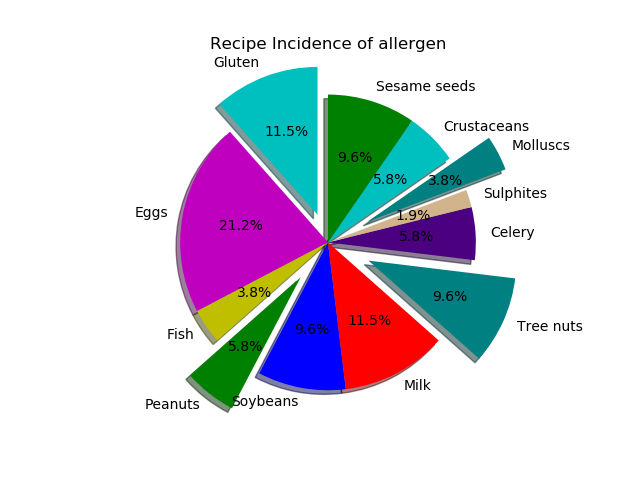

In [128]:
def allergen_pie(): 
    slices = recipesDataFrame['Gluten'].value_counts()[True], recipesDataFrame['Eggs'].value_counts()[True],\
    recipesDataFrame['Fish'].value_counts()[True],recipesDataFrame['Peanuts'].value_counts()[True],\
    recipesDataFrame['Soybeans'].value_counts()[True],recipesDataFrame['Milk'].value_counts()[True],\
    recipesDataFrame['Tree nuts'].value_counts()[True], recipesDataFrame['Celery'].value_counts()[True],\
    recipesDataFrame['Sulphites'].value_counts()[True], recipesDataFrame['Molluscs'].value_counts()[True],\
    recipesDataFrame['Crustaceans'].value_counts()[True], recipesDataFrame['Sesame seeds'].value_counts()[True]
    activities = ["Gluten","Eggs","Fish","Peanuts","Soybeans","Milk","Tree nuts","Celery","Sulphites","Molluscs","Crustaceans","Sesame seeds"]
    cols = ['c','m','y','g','b','r','teal','indigo','tan','teal','c','g']

    plt.pie(slices, colors=cols, labels=activities, startangle=90, shadow=True, explode=(0.2,0,0,0.3,0,0,0.3,0,0,0.3,0,0), autopct='%1.1f%%')

    plt.title('Recipe Incidence of allergen')
    plt.show()


allergen_pie()